In [29]:
import pandas as pd

# Load  dataset
df = pd.read_csv("Titanic_Train.csv")

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [31]:
# Drop irrelevant columns
df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)

# Fill missing values
df["Age"]=df["Age"].fillna(df["Age"].mean())
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])

# Encode categorical variables
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

# Features and target
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(2), float64(2), int64(5)
memory usage: 50.6 KB


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.6983240223463687


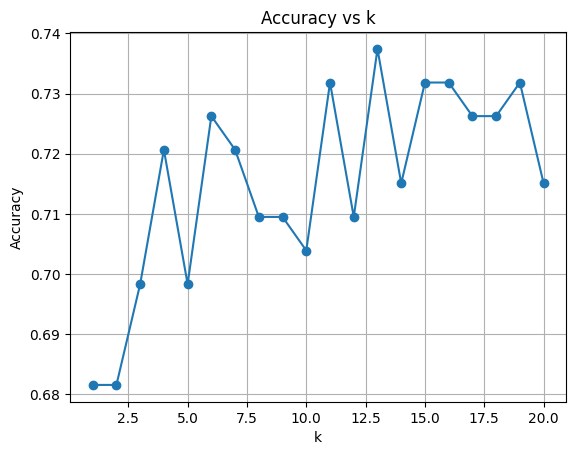

In [34]:
import matplotlib.pyplot as plt

accuracy_scores = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Accuracy vs k")
plt.grid(True)
plt.show()


In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_s, y_train_s)
y_pred_s = knn_scaled.predict(X_test_s)

print("Accuracy after scaling:", accuracy_score(y_test_s, y_pred_s))

Accuracy after scaling: 0.7988826815642458


In [36]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_s, y_pred_s)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[90 15]
 [21 53]]


In [37]:
for ratio in [0.4, 0.2]:
    X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_scaled, y, test_size=ratio, random_state=42)
    knn_r = KNeighborsClassifier(n_neighbors=5)
    knn_r.fit(X_train_r, y_train_r)
    y_pred_r = knn_r.predict(X_test_r)
    print(f"Accuracy with {int((1-ratio)*100)}-{int(ratio*100)} split:", accuracy_score(y_test_r, y_pred_r))

Accuracy with 60-40 split: 0.7815126050420168
Accuracy with 80-20 split: 0.7988826815642458
